Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [57]:
import pandas as pd

# Read the CSV files
df_city_bike = pd.read_csv('df_city_bike.csv')
df_foursquare = pd.read_csv('df_foursquare.csv')
df_yelp = pd.read_csv('df_yelp.csv')

# Print column names
print("df_city_bike columns:", df_city_bike.columns)
print("df_foursquare columns:", df_foursquare.columns)
print("df_yelp columns:", df_yelp.columns)


df_city_bike columns: Index(['name', 'empty_slots', 'free_bikes', 'latitude', 'longitude'], dtype='object')
df_foursquare columns: Index(['Name', 'Rating', 'Location'], dtype='object')
df_yelp columns: Index(['Name', 'Rating', 'Address', 'Phone'], dtype='object')


In [68]:
# Adicionar coluna de índice numérico em cada DataFrame
df_city_bike['index'] = df_city_bike.index
df_foursquare['index'] = df_foursquare.index
df_yelp['index'] = df_yelp.index




,Name,Rating,Location,index
0,Maori Gastronomia Alternativa,8.8,"{'address': 'CLN 110 Bl. D', 'address_extended...",0
1,Fratello Uno,9.0,"{'address': 'CLN 109 Bl. D', 'address_extended...",1
2,Café e Um Chêro,8.8,"{'address': 'CLN 109 Bl. C', 'address_extended...",2
3,Stonia Ice Creamland,8.3,"{'address': 'CLN 109 Bl. C', 'address_extended...",3
4,El Paso,8.1,"{'address': 'Cln 110', 'address_extended': 'lj...",4
...,...,...,...,...
90,Monjolo Biscoitos Caseiros,7.1,"{'address': 'Cln 404 Bl D', 'address_extended'...",90
91,Cantucci Bistrô,7.3,"{'address': 'Cln 403', 'address_extended': 'lj...",91
92,Pardim,7.0,"{'address': 'Quadra Cln, 405', 'address_extend...",92
93,Quanto Cafe,8.6,{'address': 'Comercio Local Norte 103 Bloco A ...,93


In [62]:
# Perform joins with index
merged_df = df_city_bike.merge(df_foursquare, on='index')
merged_df = merged_df.merge(df_yelp, on='index')

# Removing index
merged_df = merged_df.drop('index', axis=1)


In [63]:
print(merged_df.head())


                    name  empty_slots  free_bikes   latitude  longitude  \
0  56 - CLN 110 W1 Norte            7           4 -15.758862  -47.88882   
1           54 - CLN 107            5           6 -15.766000  -47.88646   
2  42 - CLN 204 L1 Norte            7           4 -15.776620  -47.87749   
3  48 - CLN 209 L1 Norte            6           9 -15.757370  -47.88223   
4  43 - SQN 405 L2 Norte            8           7 -15.771630  -47.87505   

   index                         Name_x  Rating_x  \
0      0  Maori Gastronomia Alternativa       8.8   
1      1                   Fratello Uno       9.0   
2      2                Café e Um Chêro       8.8   
3      3           Stonia Ice Creamland       8.3   
4      4                        El Paso       8.1   

                                            Location  \
0  {'address': 'CLN 110 Bl. D', 'address_extended...   
1  {'address': 'CLN 109 Bl. D', 'address_extended...   
2  {'address': 'CLN 109 Bl. C', 'address_extended...   
3  {'a

In [64]:
# Export the merged DataFrame to a CSV file
merged_df.to_csv('merged_data.csv', index=False)


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

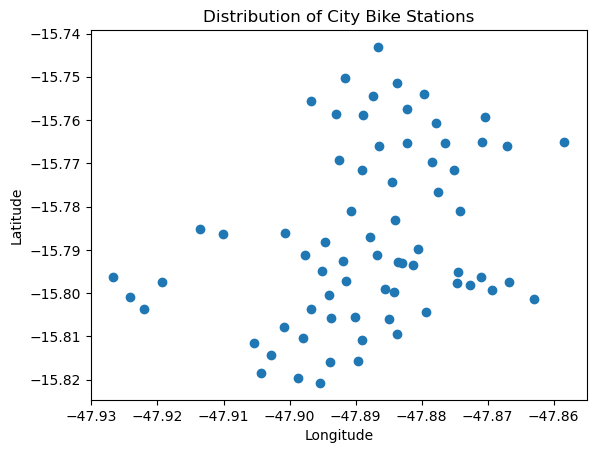

In [46]:
import matplotlib.pyplot as plt

# Plot scatter plot of latitude and longitude
plt.scatter(df_city_bike['longitude'], df_city_bike['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of City Bike Stations')
plt.show()


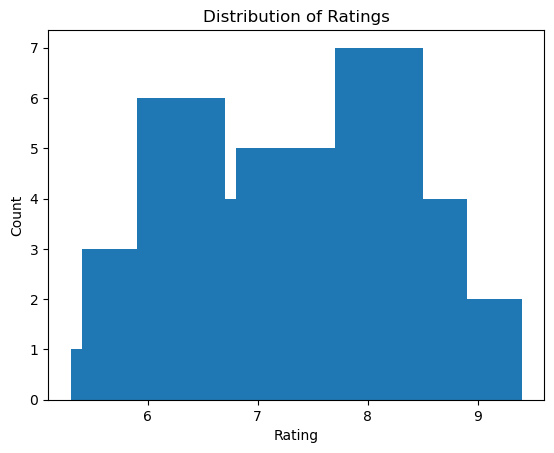

In [54]:
import matplotlib.pyplot as plt

# Group ratings by count
rating_counts = df_foursquare['Rating'].value_counts().sort_index()

# Plot bar plot of ratings
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()


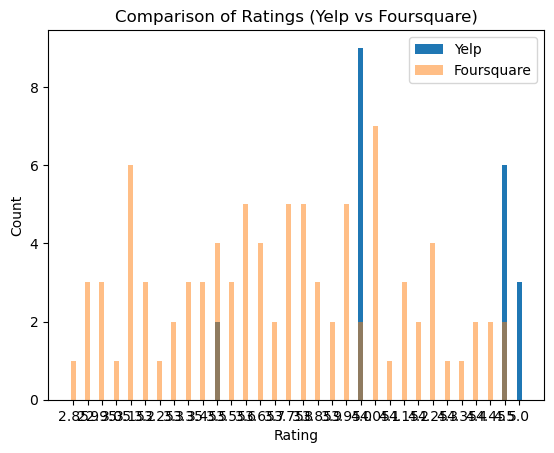

In [56]:
import matplotlib.pyplot as plt

# Normalize Foursquare ratings by dividing by 2
df_foursquare['Rating'] = df_foursquare['Rating'] / 2

# Group ratings by count for Yelp and Foursquare
yelp_rating_counts = df_yelp['Rating'].value_counts().sort_index()
foursquare_rating_counts = df_foursquare['Rating'].value_counts().sort_index()

# Get the unique rating values
rating_values = sorted(set(yelp_rating_counts.index) | set(foursquare_rating_counts.index))

# Plot grouped bar plot of ratings
bar_width = 0.35
index = range(len(rating_values))

plt.bar(index, yelp_rating_counts.reindex(rating_values), bar_width, label='Yelp')
plt.bar(index, foursquare_rating_counts.reindex(rating_values), bar_width, label='Foursquare', alpha=0.5)

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Comparison of Ratings (Yelp vs Foursquare)')
plt.xticks(index, rating_values)
plt.legend()
plt.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Look at the data before and after the join to validate your data.